# **<p style = "text-align: center">LẬP TRÌNH KHOA HỌC DỮ LIỆU</p>**
## **<p style = "text-align: center">Đồ án Cuối kì</p>**
## **<p style = "text-align: center">ĐẶT VÀ TRẢ LỜI CÂU HỎI</p>**

### <p style = "text-align: center"> <b>Đề tài:</b> Thống kê phân tích giá nhà ở Hà Nội</p>
<p style = "text-align: center"> Sinh viên thực hiện </p>

| Mã số sinh viên | Họ và tên |
| --- | --- |
| 20120040 | Nguyễn Quang Gia Bảo |
| 20120127 | Trần Minh Tuấn Kiệt |
| 20120136 | Huỳnh Tuấn Nam |
| 20120158 | Trần Hoàng Anh Phi |

---

# **Import the package**

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

# **Information of dataset**
- Dataset được lấy từ <a href = "https://www.kaggle.com"> Kaggle </a>. <br>
- Dataset là thông tin giá cả của những căn nhà ở Hà Nội thông qua các đặc điểm của một căn nhà.<br>
- Trang của Dataset <a herf = "https://www.kaggle.com/datasets/ladcva/vietnam-housing-dataset-hanoi"> https://www.kaggle.com/datasets/ladcva/vietnam-housing-dataset-hanoi</a>. <br>
- Tác giả của Dataset: LE ANH DUC. <br>
- License: CC BY-NC-SA 4.0

### Đọc dữ liệu từ file EDA_preprocessing.csv

In [77]:
house_df = pd.read_csv('./csv/EDA_Preprocessing.csv')

In [78]:
display(house_df)

,Date,Address,District,Ward,Type,Legal,Number of floors,Number of bedrooms,Area,Length,Width,Price/m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4.0,5.0,46.0,NaN,NaN,86960000.0
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3.0,37.0,NaN,NaN,116220000.0
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4.0,4.0,40.0,10.00,4.0,65000000.0
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6.0,51.0,12.75,4.0,100000000.0
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4.0,36.0,9.00,4.0,86110000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
81676,2019-08-23,"Đường Hồ Tùng Mậu, Phường Phúc Diễn, Quận Bắc ...",Quận Bắc Từ Liêm,Phường Phúc Diễn,Nhà phố liền kề,NaN,NaN,3.0,38.0,NaN,NaN,81580000.0
81677,2019-08-07,"Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầ...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",NaN,NaN,3.0,50.0,NaN,NaN,292000000.0
81678,2019-08-07,"Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",Đã có sổ,NaN,4.0,41.0,NaN,NaN,341460000.0
81679,2019-08-05,"Đường Quan Hoa, Phường Quan Hoa, Quận Cầu Giấy...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà ngõ, hẻm",Đã có sổ,NaN,4.0,60.0,NaN,NaN,101670000.0


In [79]:
pattern = '%Y-%m-%d'
house_df['Date'] = pd.to_datetime(house_df['Date'], format=pattern)

---

# **Đưa ra các câu hỏi cần trả lời:**

### **Câu 1**: Có thể cùng 1 đơn vị diện tích mà giá cả nhà ở Hà Nội lại khác nhau do chiều dài hay chiều rộng?

- Khi trả lời câu hỏi thành công: Ta sẽ biết được chiều dài hay chiều rộng, cái nào mới là nhân tố quyết định giá cả của 1 căn nhà.


**Bước 1:**

In [80]:
cols = ['Area', 'Length', 'Width', 'Price/m2']
ques01_df = house_df[cols]
ques01_df

,Area,Length,Width,Price/m2
0,46.0,NaN,NaN,86960000.0
1,37.0,NaN,NaN,116220000.0
2,40.0,10.00,4.0,65000000.0
3,51.0,12.75,4.0,100000000.0
4,36.0,9.00,4.0,86110000.0
...,...,...,...,...
81676,38.0,NaN,NaN,81580000.0
81677,50.0,NaN,NaN,292000000.0
81678,41.0,NaN,NaN,341460000.0
81679,60.0,NaN,NaN,101670000.0


In [81]:
ques01_df = ques01_df.loc[ques01_df['Length'].isnull() != True]
ques01_df = ques01_df.loc[ques01_df['Width'].isnull() != True]
ques01_df

,Area,Length,Width,Price/m2
2,40.0,10.00,4.0,65000000.0
3,51.0,12.75,4.0,100000000.0
4,36.0,9.00,4.0,86110000.0
5,46.0,12.10,3.8,104350000.0
8,75.0,12.00,6.5,120000000.0
...,...,...,...,...
81540,37.0,13.00,3.0,43240000.0
81541,100.0,16.00,6.0,115000000.0
81544,80.0,14.00,5.0,262500000.0
81546,89.0,20.00,4.0,258430000.0


In [82]:
def scaling_range(x):  
    if x > 1000.0:
        return (1000,)
    elif x == (0.0):
        return (0,0)
    else:
        return (x // 100 * 100, x // 100 * 100 + 100)

In [83]:
ques01_df_width = pd.DataFrame({'scaling_width': ques01_df['Width'].apply(scaling_range)})
ques01_df = pd.concat([ques01_df, ques01_df_width], axis= 1)
ques01_df

,Area,Length,Width,Price/m2,scaling_width
2,40.0,10.00,4.0,65000000.0,"(0.0, 100.0)"
3,51.0,12.75,4.0,100000000.0,"(0.0, 100.0)"
4,36.0,9.00,4.0,86110000.0,"(0.0, 100.0)"
5,46.0,12.10,3.8,104350000.0,"(0.0, 100.0)"
8,75.0,12.00,6.5,120000000.0,"(0.0, 100.0)"
...,...,...,...,...,...
81540,37.0,13.00,3.0,43240000.0,"(0.0, 100.0)"
81541,100.0,16.00,6.0,115000000.0,"(0.0, 100.0)"
81544,80.0,14.00,5.0,262500000.0,"(0.0, 100.0)"
81546,89.0,20.00,4.0,258430000.0,"(0.0, 100.0)"


In [84]:
ques01_df.scaling_width.unique()

array([(0.0, 100.0), (1000,), (300.0, 400.0), (500.0, 600.0),
       (400.0, 500.0), (600.0, 700.0), (200.0, 300.0), (800.0, 900.0),
       (900.0, 1000.0), (100.0, 200.0), (700.0, 800.0)], dtype=object)

In [85]:
def build_scatterplot(data, x, y, hue: None, ax):
    sns.scatterplot(data = data, x = x, y = y, ax = ax)

In [86]:
def build_barplot(data, ax):
    data.plot.bar(ax = ax)

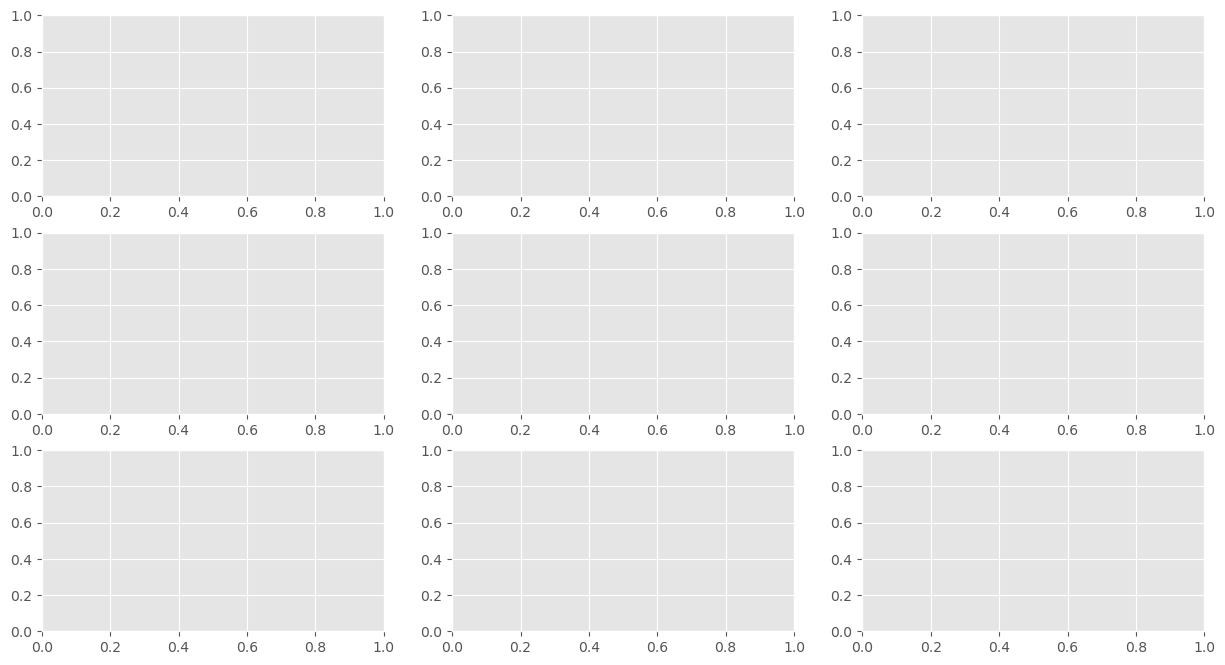

In [87]:
plt.style.use('ggplot')
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(15, 8))

# for i in range(3):
#     for j in range(3):
#         if (i == j):
#             temp_df = ques01_df[cols[i + 1]]
#             build_barplot(ques01_df, ax[i])



---

In [88]:
house_df.columns

Index(['Date', 'Address', 'District', 'Ward', 'Type', 'Legal',
       'Number of floors', 'Number of bedrooms', 'Area', 'Length', 'Width',
       'Price/m2'],
      dtype='object')

In [89]:
temp = ques01_df.Length.sort_values()
temp

43319         1.0
79800         1.0
24623         1.0
80318         1.0
38938         1.0
           ...   
47430     16500.0
6815      19000.0
19653     19000.0
11493    120000.0
67665    900000.0
Name: Length, Length: 19627, dtype: float64